Script de génération des graphiques :

1 - imports et lecture des données

In [60]:
import matplotlib.pyplot as plt

ASPl  = open('data/ASPLogistics.txt','r')
BAPTl  = open('data/BAPTLogistics.txt','r')
    
ASPl_t = ASPl.readlines()
BAPTl_t = BAPTl.readlines()


2 - récupération des données
    (itération sur les fichiers textes et création des vecteurs de données)

In [61]:
values_ASP = []
values_BAPT = []
pb_ASP = []
pb_BAPT = []


for i in range(len(ASPl_t)) : #on itere sur les lignes dans le texte
    if (ASPl_t[i][1] != '\n') : #si la ligne a plus de 0 caractère
        for j in range(len(ASPl_t[i])) : #on itere sur les caractère dans la ligne
            if (ASPl_t[i][j] == 's') : #si le caractère = s
                values_ASP.append(ASPl_t[i][j-6:j-1])
                pb_ASP.append(ASPl_t[i-1][0] + ASPl_t[i-1][1])  
                break       

            
for i in range(len(BAPTl_t)) : #on itere sur les lignes dans le texte  
    if (BAPTl_t[i][1] != '\n') :      
        for j in range(len(BAPTl_t[i])) : #on itere sur les caractère dans la ligne
            if (BAPTl_t[i][j] == 's') : #si le caractère = s
                values_BAPT.append(BAPTl_t[i][j-6:j-1])
                pb_BAPT.append(BAPTl_t[i-1][0] + BAPTl_t[i-1][1])
                break 
        
print(values_ASP)
print(values_BAPT)
print(pb_ASP)
print(pb_BAPT)

[' 0,10', ' 0,10', ' 0,11', ' 0,13', ' 0,12', ' 0,09', ' 0,13', ' 0,09', ' 0,12']
[' 0,08', ' 0,07', ' 0,07', ' 0,07', ' 0,08', ' 0,08']
['1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', '9\n']
['1\n', '2\n', '3\n', '5\n', '6\n', '8\n']


3 - Traitement des données pour intergration gaphique
    (nettoyage et typage des données)

In [62]:
for i in range(len(values_ASP)) :
    if isinstance(values_ASP[i], float) : break
    if isinstance(values_ASP[i], str) :
        values_ASP[i] = values_ASP[i].replace(' ', "")
        values_ASP[i] = values_ASP[i].replace(',', '.')
        values_ASP[i] = float(values_ASP[i])
    else : values_ASP[i] = 0

for i in range(len(values_BAPT)) :
    if isinstance(values_BAPT[i], float) : break
    if isinstance(values_BAPT[i], str) :
        values_BAPT[i] = values_BAPT[i].replace(' ', "")
        values_BAPT[i] = values_BAPT[i].replace(',', '.')
        values_BAPT[i] = float(values_BAPT[i])
    else : values_BAPT[i] = 0 
    
for i in range(len(pb_ASP)) :
    if isinstance(pb_ASP[i], int) : break
    if isinstance(pb_ASP[i], str) :
        pb_ASP[i] = pb_ASP[i].replace('\n', "")
        pb_ASP[i] = pb_ASP[i].replace(',', '.')
        pb_ASP[i] = int(pb_ASP[i])    
    else : pb_ASP[i] = 0  
    
for i in range(len(pb_BAPT)) :
    if (isinstance(pb_BAPT[i] , int)) : break
    if isinstance(pb_BAPT[i] , str) :
        pb_BAPT[i] = pb_BAPT[i].replace('\n', "")
        pb_BAPT[i] = pb_BAPT[i].replace(',', '.')
        pb_BAPT[i] = int(pb_BAPT[i])
    else : pb_BAPT[i] = 0
        
print(values_ASP)
print(values_BAPT)
print(pb_ASP)
print(pb_BAPT)

[0.1, 0.1, 0.11, 0.13, 0.12, 0.09, 0.13, 0.09, 0.12]
[0.08, 0.07, 0.07, 0.07, 0.08, 0.08]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 5, 6, 8]


4 - Génération du graphe

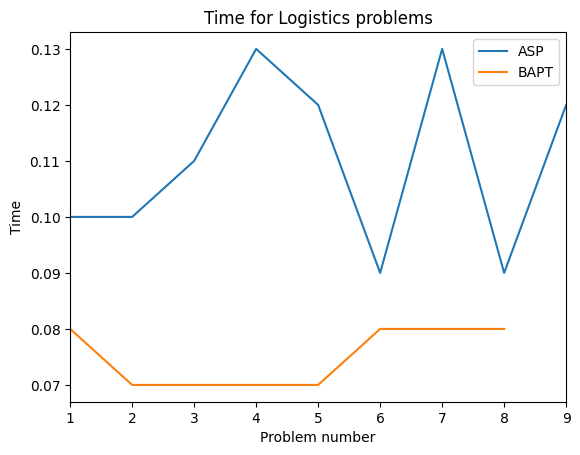

In [63]:
max_value = max(max(values_ASP),max(values_BAPT))
max_pb = max(len(pb_ASP),len(pb_BAPT))

plt.xlim(1,max_pb) 
plt.xlabel("Problem number")

#plt.ylim(0,float(max_value))
plt.yscale("linear")
plt.ylabel("Time")
plt.title("Time for Logistics problems")

plt.plot(pb_ASP,values_ASP, label = "ASP")
plt.plot(pb_BAPT,values_BAPT, label = "BAPT")


plt.savefig("graph/timeLogistics.png")
plt.legend()
plt.show()
